In [2]:
%matplotlib inline
!pip install lcapy
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from lcapy import Circuit, j, omega, s
import numpy as np
from scipy.signal import butter, lfilter
from lcapy.oneport import Y
from scipy.signal import lti 
from scipy.signal import lti 
from scipy import stats
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy import signal as sg
from scipy.optimize import fmin
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from scipy.special import factorial
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import gamma
from scipy.fft import fft, fftfreq
!pip install control
import control
import sklearn
!pip install fitter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.0/410.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00


<ipython-input-2-292a0fef8895>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 13.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=6a434794cba087563d01173bf893bd6852ca9941c502ef673925340f90a5d508
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


#*GAUSSIAN NOISE GENERATION*
It is a random character signal characterized by the non
relationship of their values ​​at different times to each other,
that is to say, white noise has as a notable characteristic the
no statistical correlation between their values.

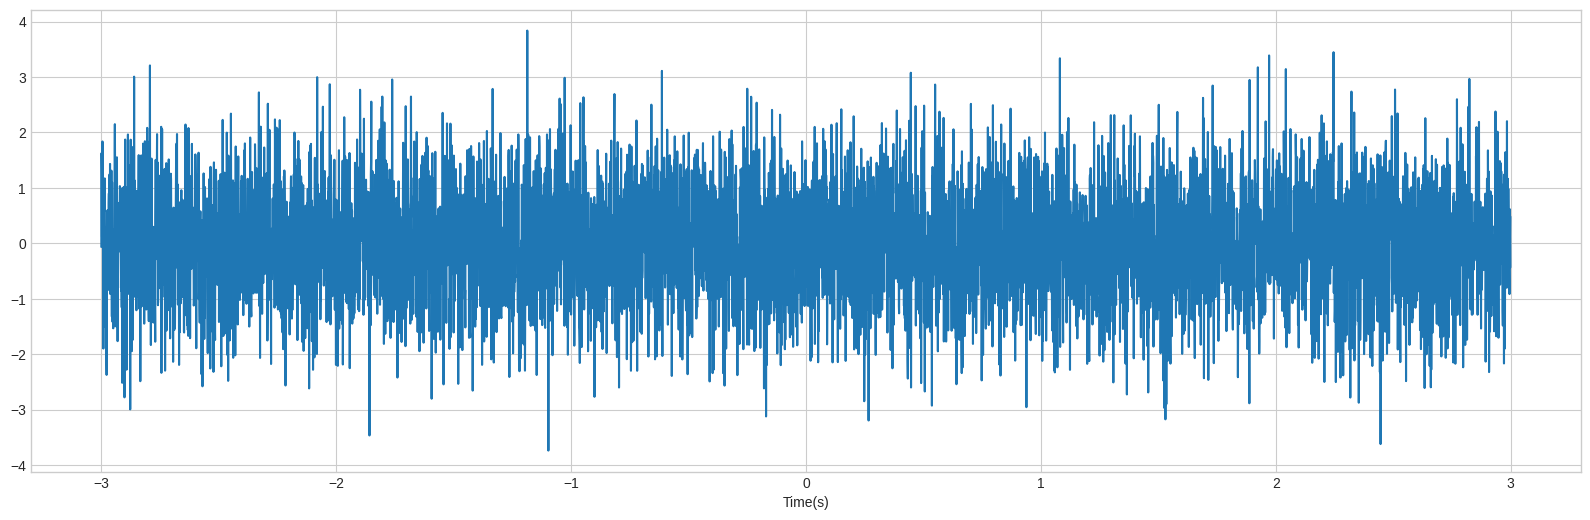

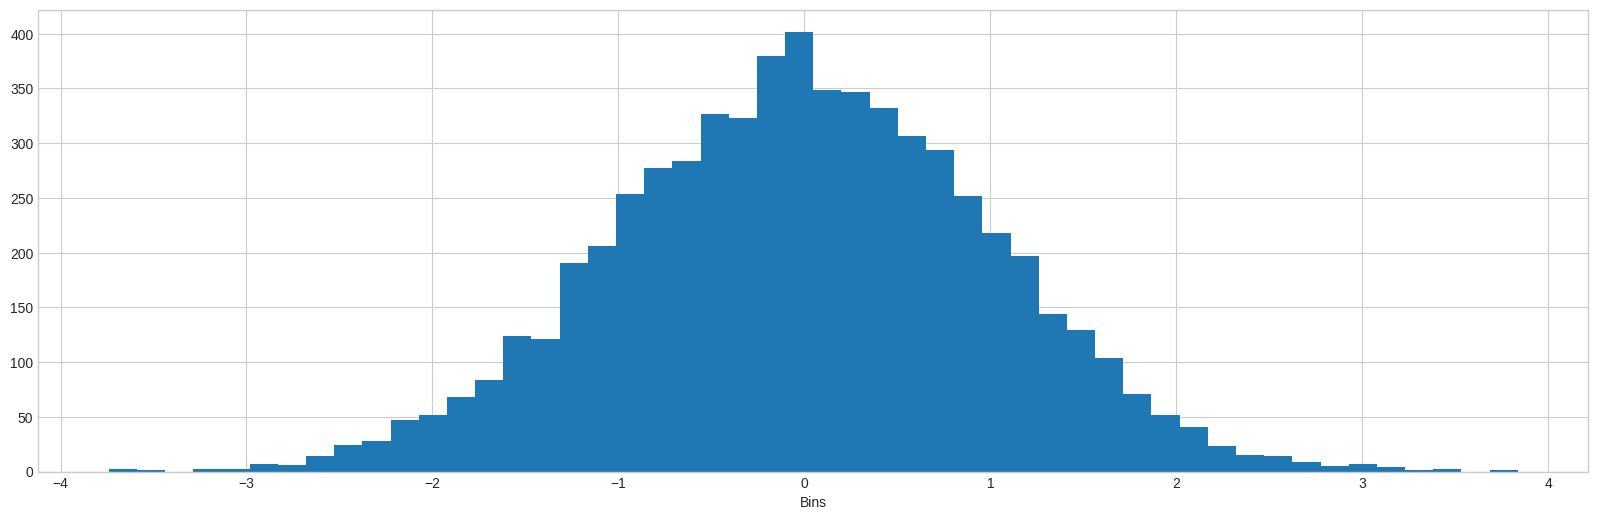

In [3]:
Nsample=4096
Fdisc=Nsample/4 # FRECUENCIA DE MUESTREO
Tdisc=1/Fdisc
t1=np.arange(-3,3,Tdisc)
rng = np.random.default_rng()
sig=rng.normal(size=t1.size)
# sig = np.random.normal(size=len(t1) )
plt.figure(figsize=(20,6))
plt.plot(t1,sig)
plt.xlabel("Time(s)")
plt.show()
# plot a histogram of the sampl
plt.figure(figsize=(20,6))
plt.hist(sig, bins=50)
plt.xlabel("Bins")
plt.show()
print()

*We look at the parameters of the distribution function*

In [4]:
mean,std=stats.distributions.norm.fit(sig)

print(f'la media es: {mean}\n la varianza es {std}')

la media es: -0.010591070456428804
 la varianza es 1.004463757107255


#*Correlation Function*





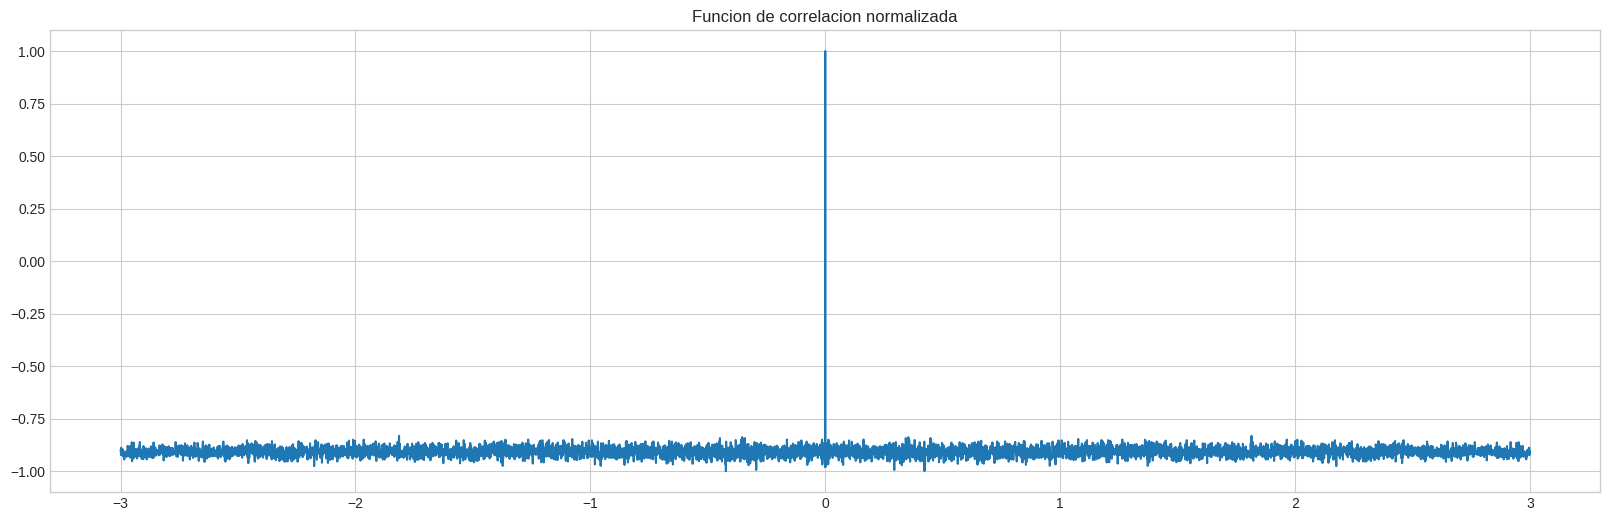

In [5]:
from numpy import linalg as LA
from sklearn.preprocessing import normalize

Autocorrelacion_expt=np.correlate(sig,sig,mode="same")

def normalize(tSignal):
      # copy the data if needed, omit and rename function argument if desired
      signal = np.copy(tSignal) # signal is in range [a;b]
      signal -= np.min(signal) # signal is in range to [0;b-a]
      signal /= np.max(signal) # signal is normalized to [0;1]
      signal -= 0.5 # signal is in range [-0.5;0.5]
      signal *=2 # signal is in range [-1;1]
      return signal

x_normed = normalize(Autocorrelacion_expt)
# x_d = np.linspace(-3, 3, Nsample)
# plt.plot(Autocorrelacion_expt, np.full_like(x_d, -0.01), '|k', markeredgewidth=1)
#Convertidor de db a gain
# control.db2mag()
'''
superposicion ruido blanco gaussiano y senoidal
'''

#Ploto nnormalizdo
plt.figure(figsize=(20,6))
plt.plot(t1,x_normed)
plt.title('Funcion de correlacion normalizada')
plt.show()

#*Input Power Spectrum*

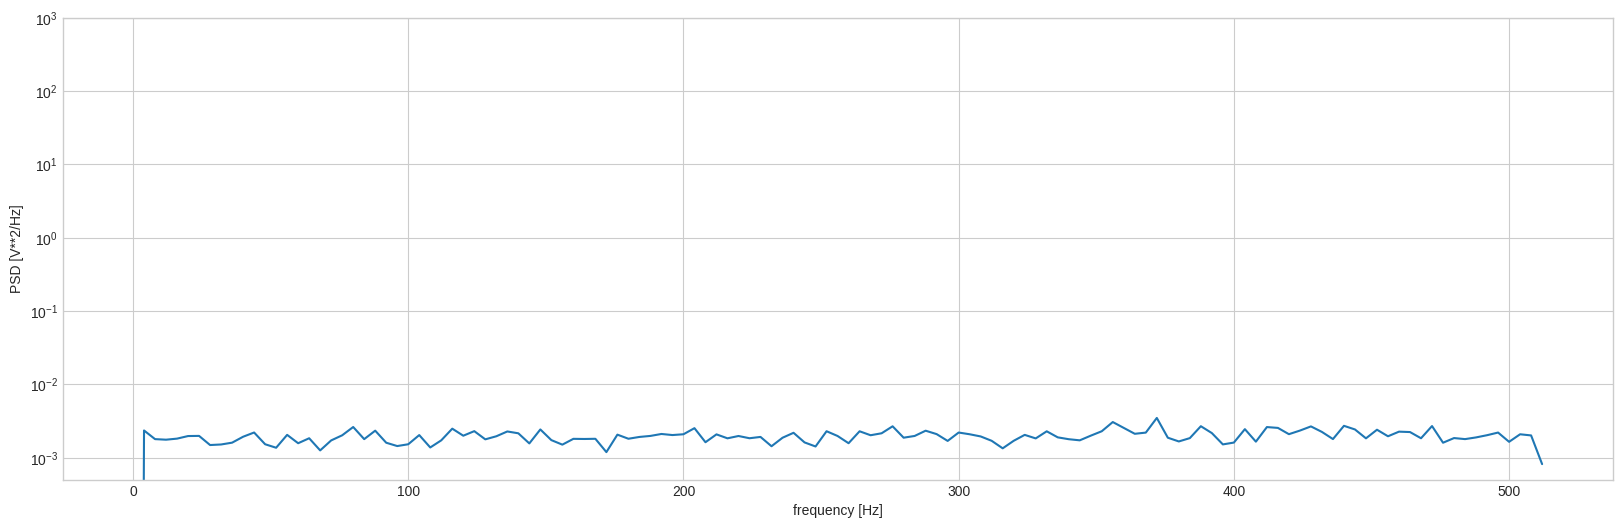

In [6]:
f1, Pxx_den = sg.welch(sig,Fdisc,window='boxcar')
plt.figure(figsize=(20,6))
plt.semilogy(f1, Pxx_den)
plt.ylim([0.5e-3, 1000])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

#*External case analysis: Addition of Gaussian white noise to a cosine function**

*creation of gaussian and cosine signal*

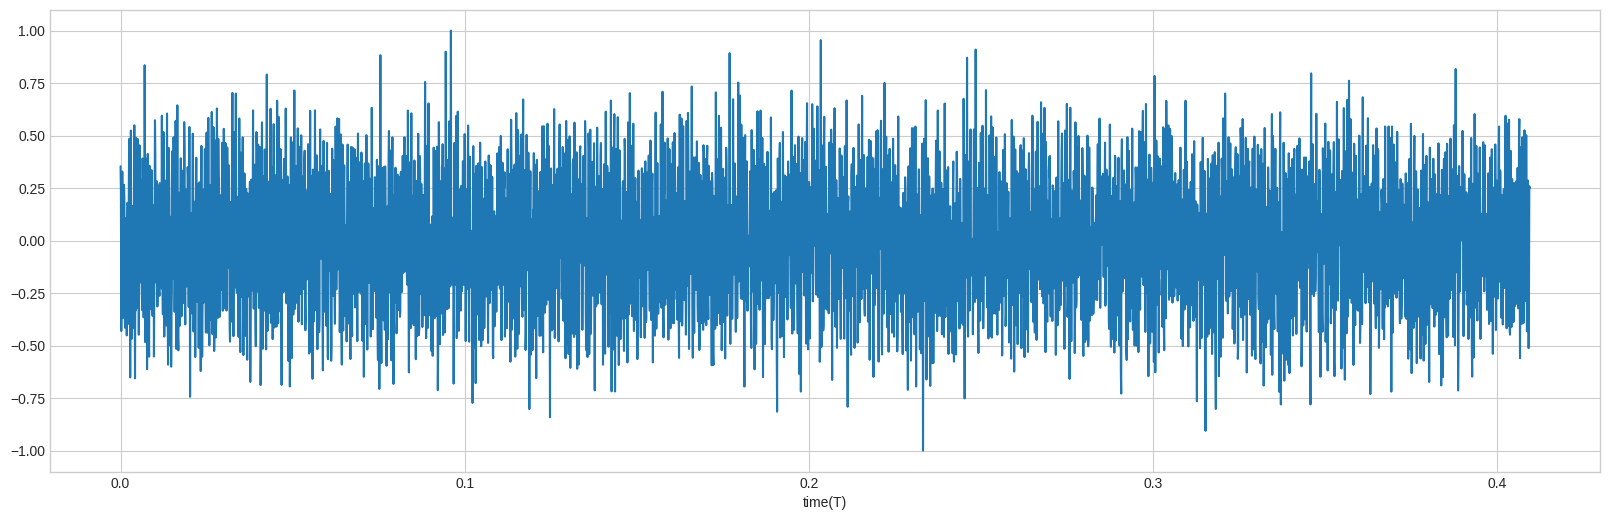

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()
# # Parámetros de la señal coseno
fs = 10e3
N = 1e5
amp = (2**1)
noise_power = 0.001 * fs / 2
Nsample=4096
time = np.arange(Nsample) /fs
freq=2000
x = amp*np.cos(2*np.pi*time*freq)
x += rng.normal( size=time.shape)
x=normalize(x)
plt.figure(figsize=(20,6))
plt.plot(time,x)
plt.xlabel('RBG+Cos')
plt.xlabel('time(T)')
plt.show()

*Correlation function sum of signals*

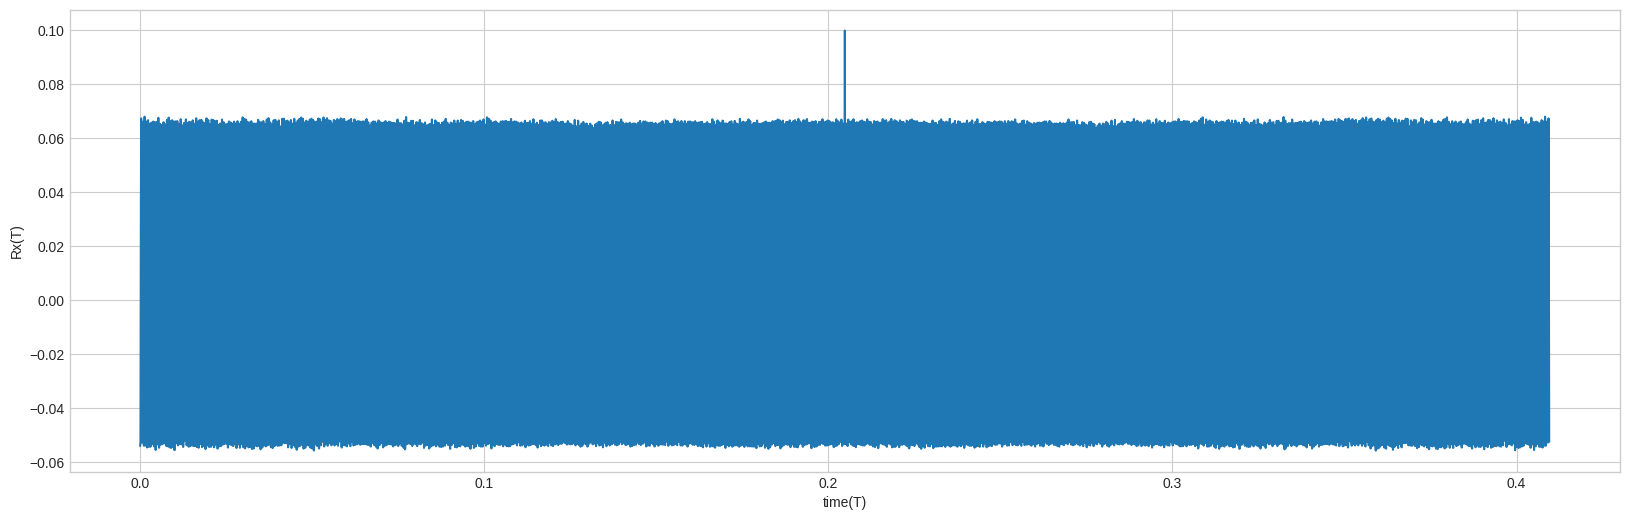

In [8]:
def autocross(x, y):
    c = np.correlate(x, y, "same")
    v = [c[i]/( len(x)-abs( i - (len(x)/2)  ) ) for i in range(len(c))]
    return v

corr=autocross(x,x)
# corr = signal.correlate(x, x, mode='same') 
# corr= [corr[i]/( len(x)-abs( i - (len(x)/2)  ) ) for i in range(len(corr))]
plt.figure(figsize=(20,6))
plt.plot(time,corr)
plt.xlabel('time(T)')
plt.ylabel('Rx(T)')
plt.show()

*Power spectrum of the above function*

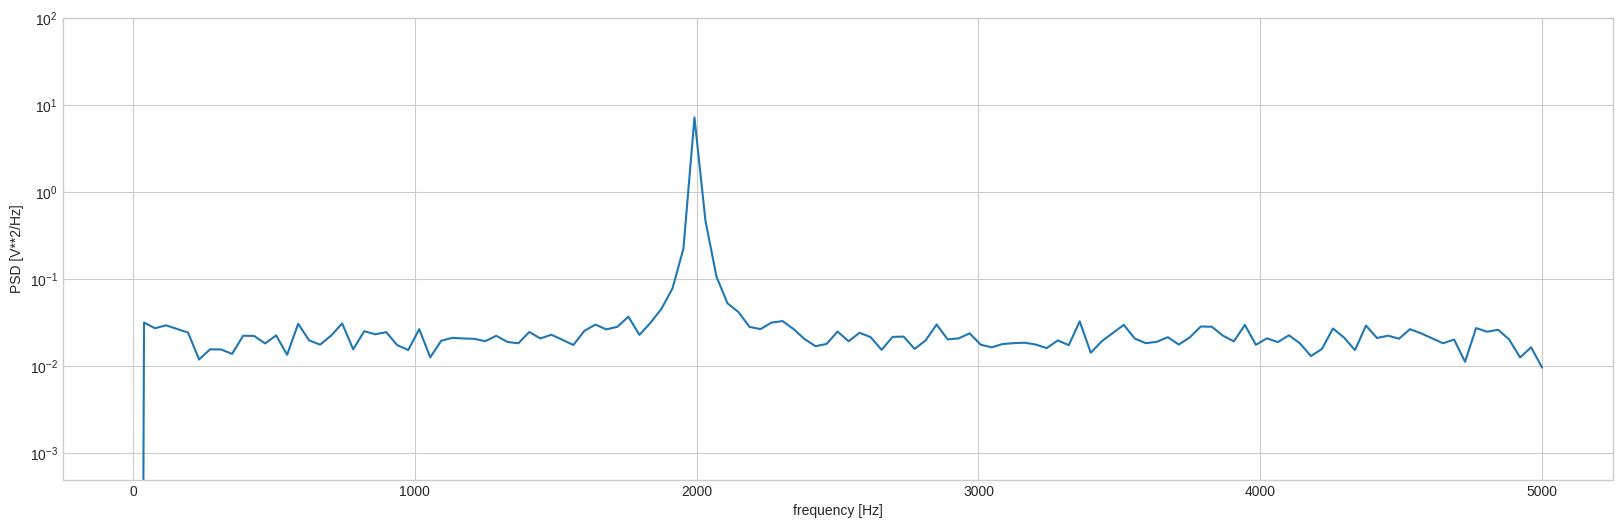

In [9]:
from scipy import signal
freq = 2000.0
amp = (2**3)*np.pi
x = amp*np.cos(2*np.pi*time*freq+(2*np.pi)/3)
x += rng.normal(scale=10,size=time.shape)
f, Pxx_den = signal.welch(x,fs, window='boxcar')
plt.figure(figsize=(20,6))
plt.semilogy(f, Pxx_den)
plt.ylim([0.5e-3, 100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

#*Transfer function*

In [10]:
#importamos las librerias para crear el circuito 
!pip install lcapy
!apt install texlive-latex-base
!apt-get install texlive-latex-extra
!apt-get update && apt-get install -y --no-install-recommends \
    texlive-fonts-recommended \
    texlive-latex-extra \
    texlive-fonts-extra \
    dvipng \
    lmodern

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35
  libjbig2dec0 libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common
  texlive-base texlive-binaries xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc
The following NEW packages will be ins

/usr/local/lib/python3.10/dist-packages/lcapy/schematic.py:593: UserWarning: Have circuitikz version 1.0; should upgrade to 1.4.5 or later
  warn('Have circuitikz version %s; should upgrade to %s or later'


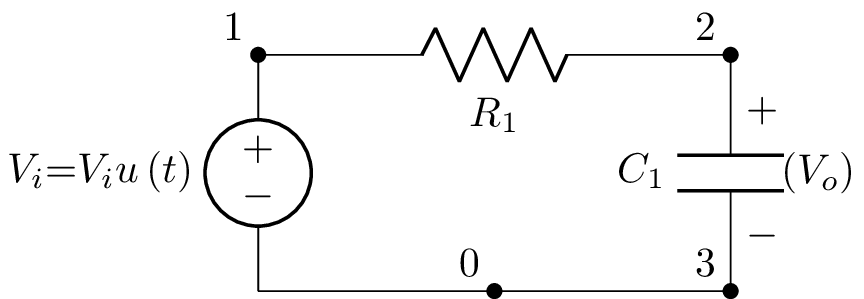

In [11]:
ctt=Circuit("""
Vi 1 0_1 step;down
R1 1 2; right, size=1.5
C1 2 3; down,v=(V_o)

W 0_1 0;right
W 0 3;right
"""
)
ctt.draw() # Resolver

*Transfer function*

In [12]:
H=(ctt.R1.V(s)/ctt.Vi.V(s)).simplify()
H

  C₁⋅R₁⋅s  
───────────
C₁⋅R₁⋅s + 1

In [13]:
#Dando valores al circuito:
C1=1*10**(-6)
R1=1000
# R2=2000
Coeficientes_num=[1] #Coeficientes numerador
Coeficientes_dem=[C1*R1,1] #Coeficientes denominador=4.7e-4
Low_f=control.tf(Coeficientes_num,Coeficientes_dem)
Low_f

TransferFunction(array([1]), array([0.001, 1.   ]))

*Bode plot*

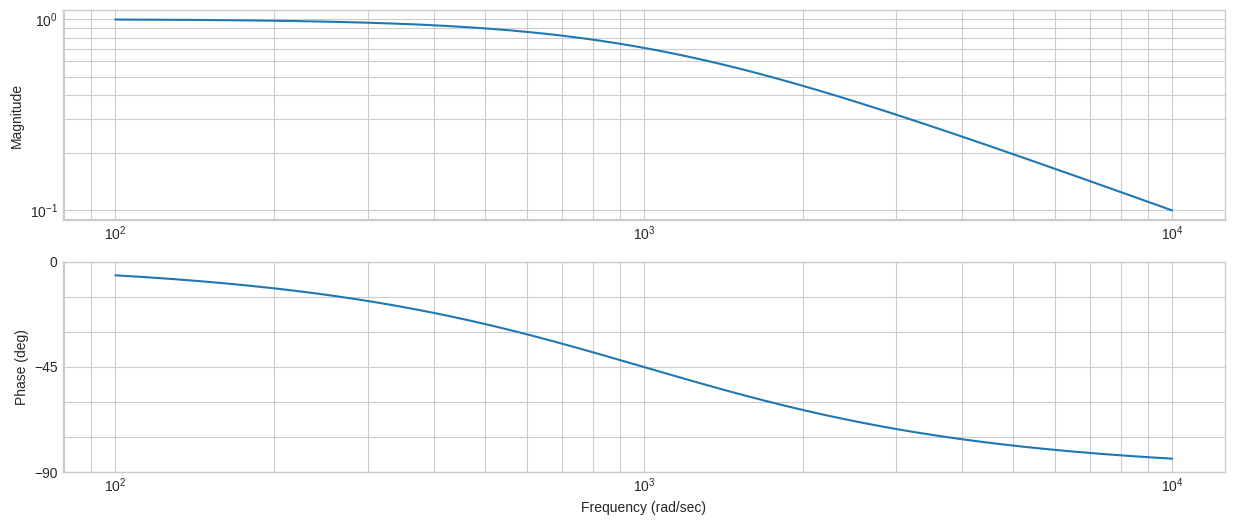

In [14]:
plt.figure(figsize=(15,6))
mag,phase,omega = control.bode(Low_f)

In [15]:
H=H.subs("C1",C1).subs("R1",R1)
H

       s       
───────────────
     ⎛ s      ⎞
1000⋅⎜──── + 1⎟
     ⎝1000    ⎠

#*Output power spectrum*

*Tenemos que tener encuenta que para obtener el espectro de potencia a la salida del ciruito por fourier podemos hacer*
$\delta_y[\omega] = \delta_x[\omega].|H[\omega]|^2$

*Senal RGB + Cosenoidal*

In [16]:
sy=f*abs(H)**2
sy[3]

     ⎛                                             2                          
     ⎜              ⎛                         2   ⎞                          2
1875⋅⎝1000000000000⋅⎝(rₑ(s) + 1000)⋅rₑ(s) + iₘ (s)⎠  + 1000000000000000000⋅iₘ 
──────────────────────────────────────────────────────────────────────────────
                                                               2              
                     ⎛                      2             2   ⎞               
                  16⋅⎝1000000⋅(rₑ(s) + 1000)  + 1000000⋅iₘ (s)⎠               

   ⎞
   ⎟
(s)⎠
────
    
    
    

*Senal RGB*

In [17]:
sy=f1*abs(H)**2
sy[3]

   ⎛                                             2                            
   ⎜              ⎛                         2   ⎞                          2  
12⋅⎝1000000000000⋅⎝(rₑ(s) + 1000)⋅rₑ(s) + iₘ (s)⎠  + 1000000000000000000⋅iₘ (s
──────────────────────────────────────────────────────────────────────────────
                                                            2                 
                  ⎛                      2             2   ⎞                  
                  ⎝1000000⋅(rₑ(s) + 1000)  + 1000000⋅iₘ (s)⎠                  

 ⎞
 ⎟
)⎠
──
  
  
  

*Miramos el espectro de potencia cuando metemos la senal dentro del circuito rc*

#Theoretical Calculations


# Gaussian white noise and cosine signal

- Tenemos la señal cosenoidal: $ x(t)=4cos(2π t+π/3) $
\
La funcion de corelación:

$$R_{x}(τ)=\lim_{t\rightarrow \infty }\frac{1}{T}\int_{T}^{}x(t)x^{*}(t+\tau)dt$$

donde  $ x(t)=4cos(2π t+π/3) $, remplazmos y tenemos:

$$R_{x}(τ)=\lim_{t\rightarrow \infty }\frac{1}{T}\int_{T}^{}4cos(2\pi t+\pi/3)4cos(2\pi t+2\pi \tau+\pi/3)dt$$

$$
=\lim_{t\rightarrow \infty }\frac{16}{T}\int_{T}^{}\frac{1}{2}cos(2\pi \tau)+cos(4\pi t+2\pi \tau+2\pi/3)dt
$$

$$=\frac{16}{2T}[\int_{T}^{}(cos(2\pi \tau)+cos(4\pi t+2\pi/3+2\pi \tau))dt]$$

Integramos :
$$R_{x1}(τ)=\frac{16}{2T}[\int_{T}^{}(cos(2\pi \tau))dt+\int_{T}^{}(cos(4\pi t+2\pi/3+2\pi \tau))dt]$$

$$=\frac{16}{2T}[cos(2\pi \tau)]$$ 
$$=8cos(2\pi \tau)$$ 


- Sabemos que la funcion de correlacion de RBG por definición es:
$$\int_{-\infty }^{+\infty}f(x)e^{-j2\pi ft}dt$$

$$R_{n}(τ)=\int_{-\infty }^{+\infty}\frac{N_{o}}{2}e^{-j2\pi ft}dt$$
$$R_{x2}(\tau)=\frac{N_{o}}{2}\delta (\tau)$$

por ultimo:
$$R_{\varepsilon }(\tau)=R_{x1 }(\tau)+R_{x2}(\tau)$$
$$R_{\varepsilon }(\tau)=8cos(2\pi \tau)+\frac{N_{o}}{2}\delta (\tau)$$
- Espectro de potencia:

Por la transformada de wiener jinch tenemos que:

$$S_{x}=\mathfrak{F}[ R_{\varepsilon }(τ)]$$
al ser lineal podemos:
$$\mathfrak{F}[ R_{\varepsilon }(τ)]=\mathfrak{F}[8cos(2\pi \tau)]+\mathfrak{F}[\frac{N_{o}}{2}\delta (\tau)]$$
$$\mathfrak{F}[8cos(2\pi \tau) ]=8\pi [δ(ω-2π)+δ(ω+2π)]$$
$$\mathfrak{F}[\frac{ω{0}}{2}δ(τ)]= \frac{N{0}}{2}$$
$$S_{ϵ}=8\pi [δ(ω-2π)+δ(ω+2π)]+\frac{N_{0}}{2}$$
- Si analizamos la funcion de correlacion en $τ=0$:
$$R_{\epsilon}(0)=8+\frac{N_{0}}{2}$$
-Salida del espectro de potencia
$$S_{n}(ω)=S_{ϵ}(ω)\left | H(\omega)^{2} \right |$$
Para un circuito RC tenemos que:
$$\left | H(\omega) \right |=(\frac{α}{jω+α})$$
Remplazamos:
$$S_{n}(ω)=(8\pi [δ(ω-2π)+δ(ω+2π)]+\frac{N_{0}}{2})(\frac{α}{jω+α})^{2}$$
$$S_{n}(ω)=(8\pi [δ(ω-2π)+δ(ω+2π)]+\frac{N_{0}}{2})(\frac{α^{2}}{ω^{2}+α^{2}})$$

#**We visualize the input signal and output signal before and after applying the low pass filter**

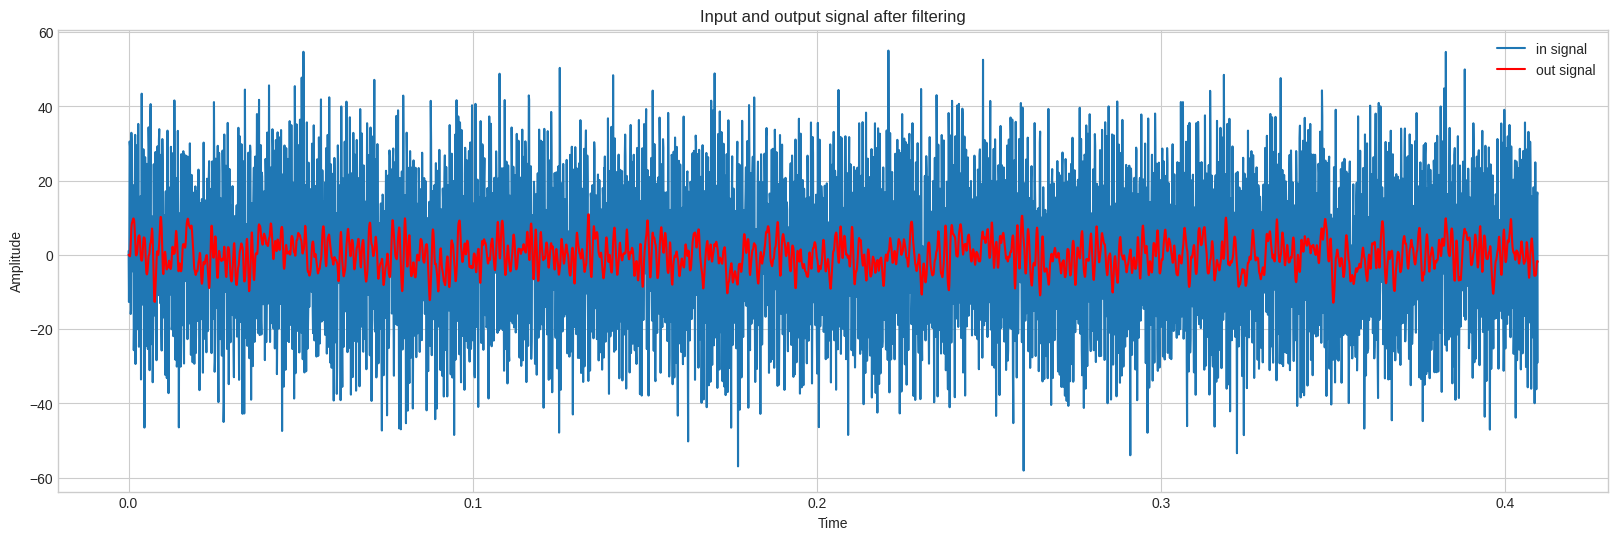

In [18]:
Frec_Cort = 1/(2*np.pi*R1*C1)  
cutoff = Frec_Cort  / Fdisc
b, a = butter(4, cutoff, btype='low')
y = lfilter(b, a, x)
plt.figure(figsize=(20,6))
plt.plot(time, x, label='in signal')
plt.plot(time, y, label='out signal', color='red')
plt.title('Input and output signal after filtering')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#**We calculate the autocorrelation:**

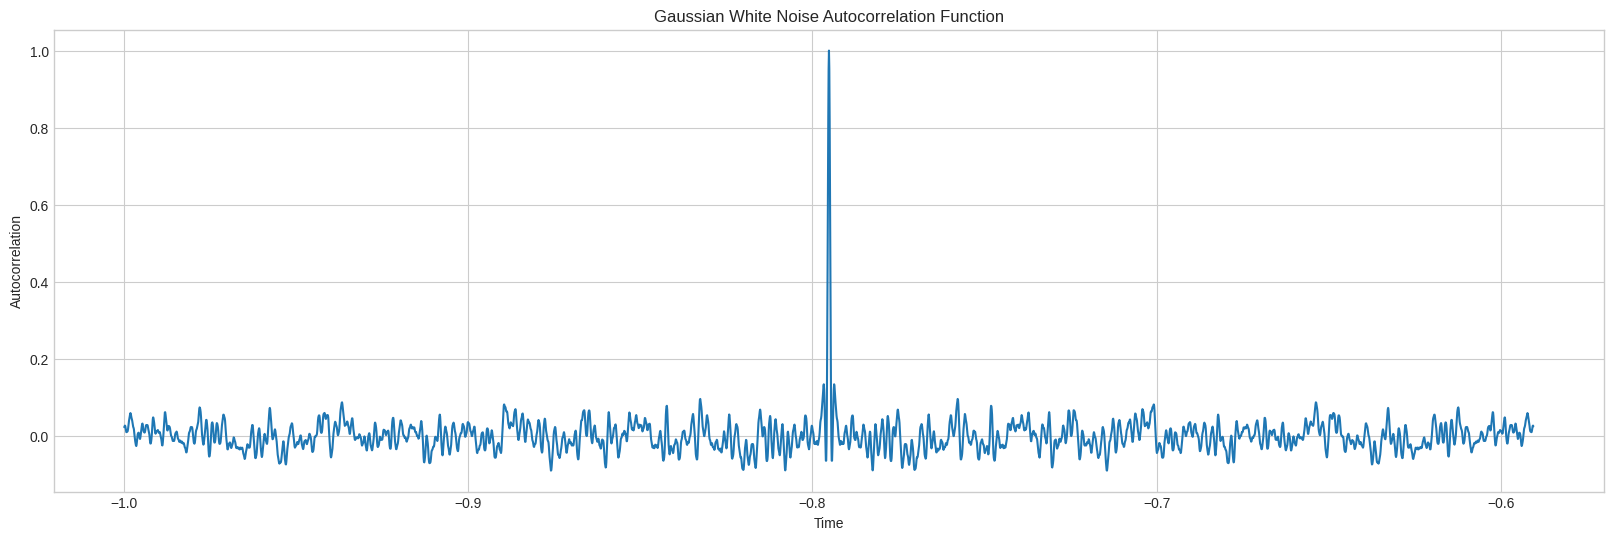

In [19]:
autocorrelation = np.correlate(y, y, mode='same')
autocorrelation/= np.max(autocorrelation)
plt.figure(figsize=(20,6))
plt.plot(time-1,autocorrelation)
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title('Gaussian White Noise Autocorrelation Function')
plt.grid(True)
plt.show()

#**We calculate the Fuorier transform to visualize the power spectrum of the input and output signals:**

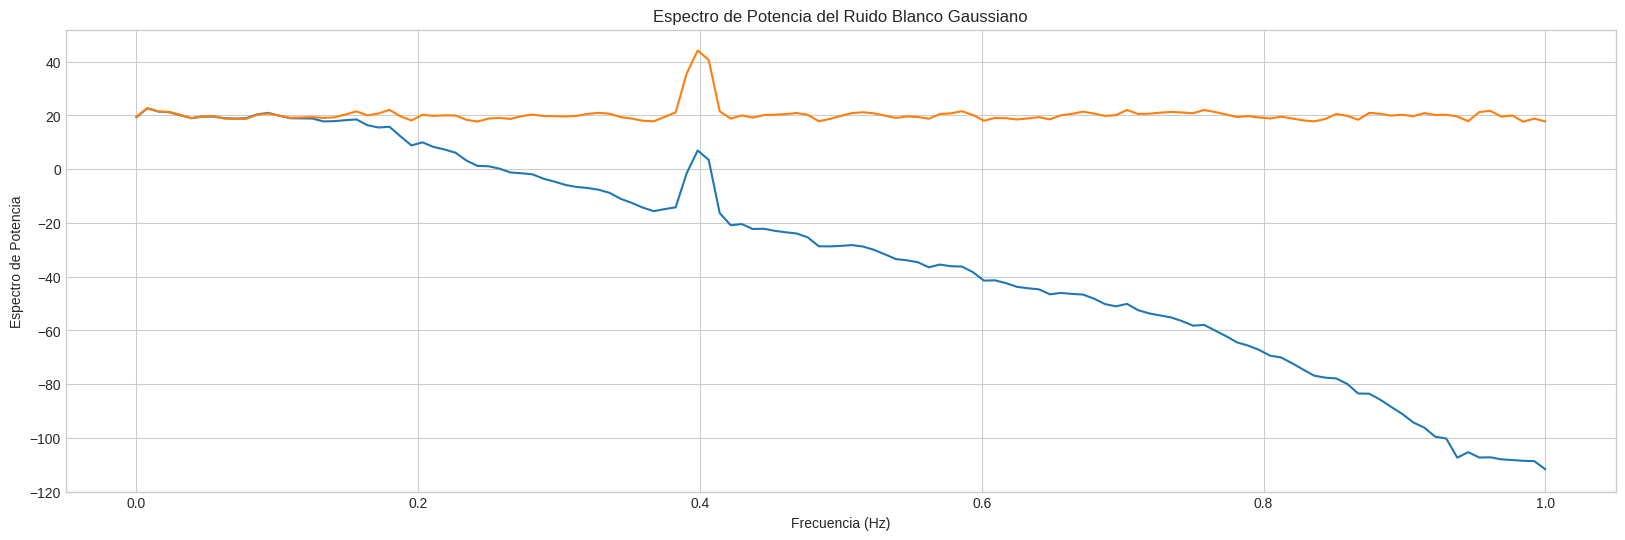

In [20]:
espectroout = np.abs(np.fft.fft(y))**2
frecuencias = np.fft.fftfreq(Nsample, 1/Fdisc)
plt.figure(figsize=(20,6))
plt.psd(y)
plt.psd(x)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia del Ruido Blanco Gaussiano')
plt.grid(True)
plt.show()